# Preparing Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as accsco

#Beautifies graphs
sns.set()

data = pd.read_csv('RANDOM DATA - Sheet1.csv', index_col="STUDENT") #reads data and drops index col
cols = data.columns[:-1]

sc = StandardScaler()


#Saves data besides outcome into numpy array
X = data.drop(columns="Outcome").values 

#Outcome data in numpy array
y = data[["Outcome"]].values 

#Scales data
X = sc.fit_transform(X)

data = pd.DataFrame(X, columns=cols)
data



,GPA (1-4),Class Rank (1-300),SAT scores,Recommendation,Extra Curricular (0 - 8),College Interview (1-10,Advanced Placement (1-40)
0,-1.449401,1.651846,-2.269180,-0.919640,1.596145,-1.661681,-1.053810
1,-2.228425,1.592001,-1.481143,-0.919640,-1.184595,-1.661681,-0.847988
2,-2.075402,1.544124,-1.367406,-1.655352,-0.628447,-1.271615,-1.053810
3,1.054603,-1.077093,1.122627,1.287496,2.708441,0.678715,0.592768
4,-1.825002,1.460341,-1.253669,-0.919640,1.596145,-0.491483,-1.053810
5,-1.588512,1.424434,-1.074939,-0.919640,-0.628447,-1.661681,-1.053810
6,0.066913,-0.047756,0.330529,0.551784,0.483849,-0.881549,-0.436343
7,-0.475622,1.137177,-0.684983,-0.183928,-1.184595,-0.491483,-0.847988
8,-1.296379,0.981580,-0.851526,-1.655352,2.708441,0.288649,-1.053810
9,0.776380,-0.885588,1.293233,1.287496,-0.628447,1.068781,1.004413


# Train and Test Set

In [6]:
#Data split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

x_train = x_train.reshape(-1,7)
y_train = y_train.reshape(-1,1)



# Methods for Forward/Back Prop

In [7]:
#Activation functions and their derivatives for back prop
def sigmoid(x):
    ex = np.exp(-x)
    y = 1 / (1 + ex)
    return y

def relu(x):
    return np.maximum(0, x)

def sigmoid_derivative(x):
    return (sigmoid(x) * (1 - (sigmoid(x))))


def relu_derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

# Training Data and Building Model

In [8]:
learning_rate = 0.1
iterations = 1000
N = y_train.size

#Structure of Network
inputlayer = 7
hiddenlayer = 4
outputlayer = 1

np.random.seed(1)

#Creation of weights
weights1 = np.random.normal(scale=0.5, size=(inputlayer, hiddenlayer))
weights2 = np.random.normal(scale=0.5, size=(hiddenlayer, outputlayer))


values = {"mean_squared_error": [], "accuracy": []}

#Training Data
for _ in range(iterations):
    #Forward Prop
    h_layer = relu(np.dot(x_train, weights1))
    o_layer = sigmoid(np.dot(h_layer, weights2))
    
    #Back Prop
    error = mse(o_layer, y_train)
    acc = accsco(o_layer.round(), y_train)
    values["mean_squared_error"].append(error)
    values["accuracy"].append(acc)
    
    output_back = (o_layer - y_train) * sigmoid_derivative(o_layer)
    hidden_back = np.dot(output_back, weights2.T) * relu_derivative(h_layer)
    
    update2 = learning_rate * np.dot(h_layer.T, output_back) / N
    update1 = learning_rate * np.dot(x_train.T, hidden_back) / N
    
    #Weight adjustment
    weights2 = weights2 - update2
    weights1 = weights1 - update1

values_data = pd.DataFrame(values)


# Plotting Correctness of Network

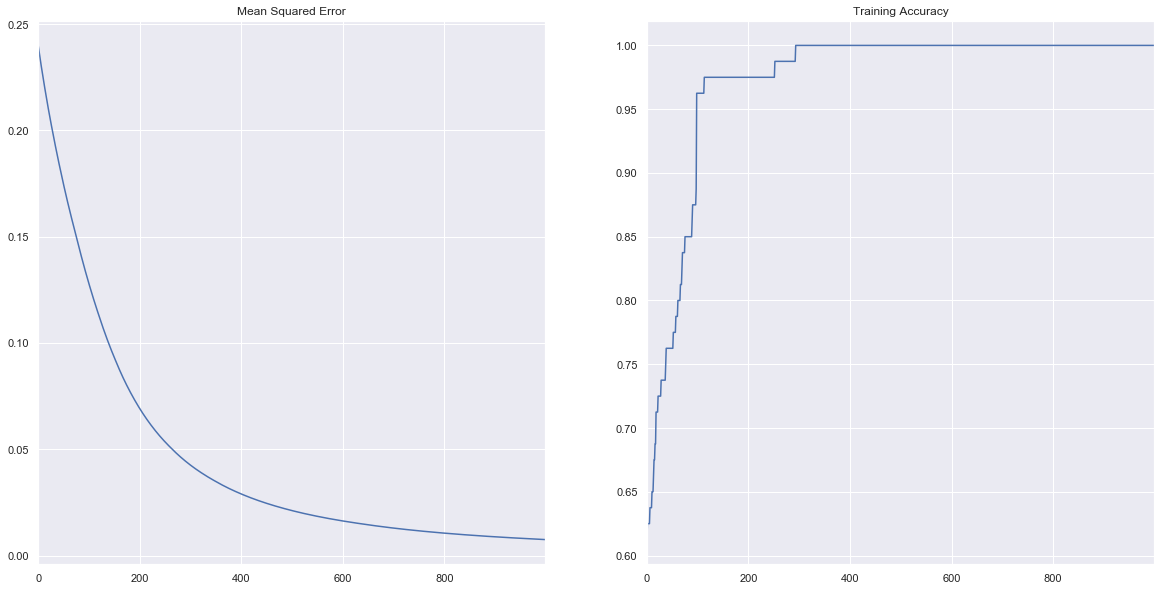

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

#Graph of decreasing mean squared error
values_data.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")

#Graph of increasing accuracy
values_data.accuracy.plot(ax=axes[1], title="Training Accuracy");




# Testing accuracy

In [10]:
#Passing test set to check accuracy of predictions
h_layer = relu(np.dot(x_test, weights1))
o_layer = sigmoid(np.dot(h_layer, weights2))
o_layer[o_layer > 0.8] = 1
o_layer[o_layer <= 0.8] = 0



print("Accuracy:", accsco(o_layer, y_test))

Accuracy: 1.0
